In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
%matplotlib inline

In [5]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:30% !important; height: 30% !important;}</style>"

In [6]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
data.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy',  max_depth=6)

In [8]:
X = data.drop(['num'], axis=1)
y = data.num

In [9]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

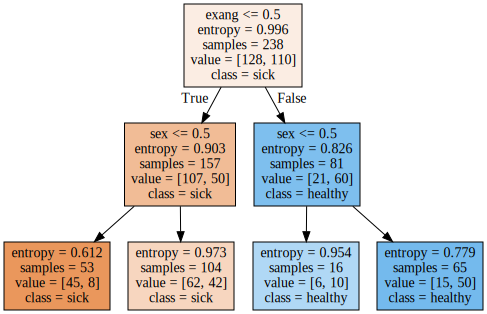

In [10]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['sick', 'healthy'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

------------------------------------------------------------------------------------------------

_______________________________________________________________________________________________

In [58]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import GridSearchCV


iris = load_iris()
x = iris.data
y_ = iris.target 
X = pd.DataFrame({'sepal_length': x[:, 0], 'sepal_width': x[:, 1], 'petal_length': x[:, 2], 'petal_width': x[:,3]})
y = pd.DataFrame({'species': y_[:]})

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [43]:
y_train.head()

,species
9,0
31,0
106,2
83,1
141,2


In [44]:
clf = DecisionTreeClassifier(criterion='entropy')

In [45]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
clf.predict(X_test)

array([0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0,
       2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1])

-----------------------------------------------------------------------
-----------------------------------------------------------------------


In [60]:
params = {'max_depth':range (1, 11), 'min_samples_split':range (2, 11), 'min_samples_leaf': range(1, 11)}
search = GridSearchCV(clf, params, cv=5)

In [62]:
search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                      

In [64]:
best_tree = search.best_estimator_